In [2]:
# Import the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Display dataset for easy lookup and use
hashData = pd.read_csv("countries.csv") #SOURCE: https://ccaf.io/cbeci/mining_map/methodology
hashData

,Date,Country,Hashrate,Absolute Hashrate
0,2019-09-01,Mainland China,75.53%,66.76
1,2019-09-01,Other,6.1%,5.39
2,2019-09-01,Russian Federation,5.93%,5.24
3,2019-09-01,United States,4.06%,3.59
4,2019-09-01,Malaysia,3.25%,2.88
...,...,...,...,...
285,2022-01-01,Russian Federation,4.66%,8.75
286,2022-01-01,Germany,3.06%,5.74
287,2022-01-01,Malaysia,2.51%,4.70
288,2022-01-01,Ireland,1.97%,3.69


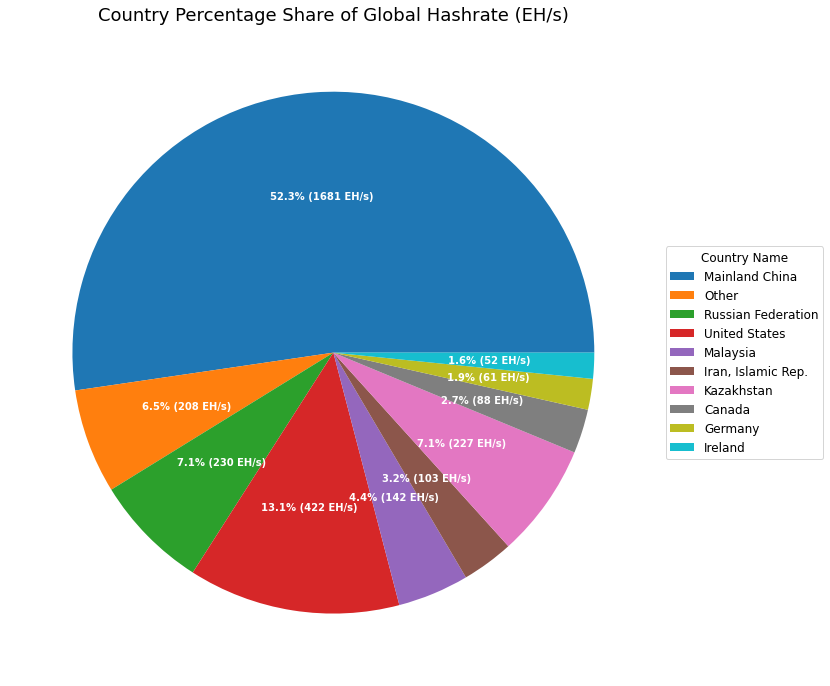

In [3]:
# Attempt 1: Pie Chart

#Prefix function to add a 0 to a number if it only has one digit for formatting
def prefix(num):
    if(num < 10):
        return '0'+str(num)
    return str(num)
    
#Create the graph!
def getGraph(startYear, startMonth, endYear, endMonth):
    #Dictionary to map each country to its own datapoint
    d = {}
    curYear = startYear
    curMonth = startMonth
    
    #Loop through the given time range
    while(curYear < endYear or (curYear == endYear and curMonth <= endMonth)):
        #Generate a date string to look up for this iteration
        dateString = str(curYear)+'-'+prefix(curMonth)+'-01'

        #Loop through the array to find the valid countries
        for i in range(len(hashData)):
            if(hashData.loc[i, 'Date'] == dateString):
                name = hashData.loc[i, 'Country']
                val = hashData.loc[i, 'Absolute Hashrate']
                
                #Update the dictionary
                if name in d:
                    d[name]+=val
                else:
                    d[name] = val
        
        #Increment the current month and year accordingly
        curMonth+=1
        if(curMonth > 12):
            curMonth = 1
            curYear+=1

    #Arrays for the data      
    countries = []
    data = []
    
    #Fill out the arrays
    for i in d.keys():
        data.append(round(d[i], 1))
        countries.append(i)
        
    fig, ax = plt.subplots(figsize=(24, 12), subplot_kw=dict(aspect="equal"))
    #Utility string manipulation function to get the string on each of the pie slices
    
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return "{:.1f}% ({:d} EH/s)".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))
    
    #Title the pie chart and modify the sizes of text
    l1 = ax.legend(wedges, countries,
              title="Country Name",
              loc="center left",
              bbox_to_anchor=(1, 0, 12, 1),
              fontsize='large')
    plt.setp(autotexts, size=10, weight="bold")
    plt.setp(l1.get_title(),fontsize='large')
    ax.set_title("Country Percentage Share of Global Hashrate (EH/s)", fontsize = 18)

    plt.show()

#Demonstration    
getGraph(2019, 9, 2021, 10)

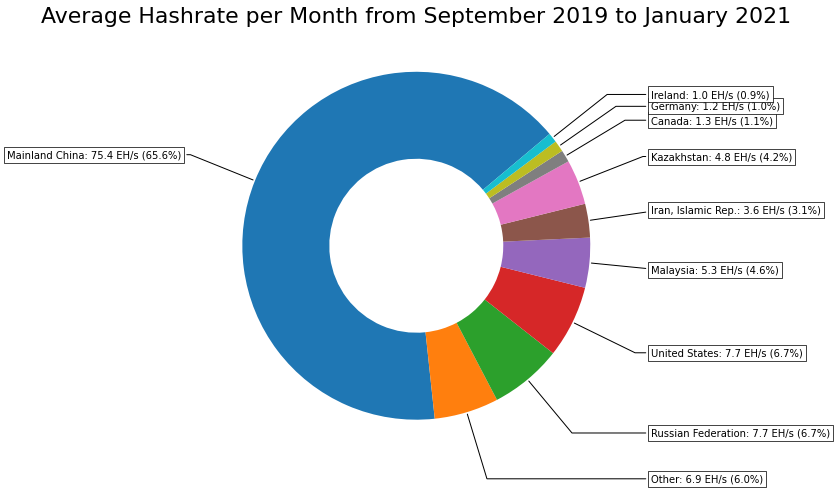

In [6]:
# Attmept 2: Doughnut chart

#Prefix function to add a 0 to a number if it only has one digit for formatting
def prefix(num):
    if(num < 10):
        return '0'+str(num)
    return str(num)

#Utility function to convert a number to its corresponding month
def toWords(month):
    if(month == 1):
        return 'January'
    if(month == 2):
        return 'February'
    if(month == 3):
        return 'March'
    if(month == 4):
        return 'April'
    if(month == 5):
        return 'May'
    if(month == 6):
        return 'June'
    if(month == 7):
        return 'July'
    if(month == 8):
        return 'August'
    if(month == 9):
        return 'September'
    if(month == 10):
        return 'October'
    if(month == 11):
        return 'November'
    if(month == 12):
        return 'December'

#Generate the graph
def getGraph(startYear, startMonth, endYear, endMonth):
    #Dictionary to map each country to its own datapoint
    d = {}
    total = 0
    curYear = startYear
    curMonth = startMonth
    months = 0
    
    #Loop through the given time range
    while(curYear < endYear or (curYear == endYear and curMonth <= endMonth)):
        #Generate a date string to look up for this iteration
        dateString = str(curYear)+'-'+prefix(curMonth)+'-01'
        
        #Loop through the array to find the valid countries
        for i in range(len(hashData)):
            if(hashData.loc[i, 'Date'] == dateString):
                name = hashData.loc[i, 'Country']
                val = hashData.loc[i, 'Absolute Hashrate']
                total += val
                
                #Update the dictionary
                if name in d:
                    d[name]+=val
                else:
                    d[name] = val
                    
        #Increment the current month and year accordingly
        months+=1
        curMonth+=1
        if(curMonth > 12):
            curMonth = 1
            curYear+=1
        
    fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(aspect="equal"))
 
    #Process data using the dictionary
    countries = []
    data = []
    
    for i in d.keys():
        countries.append(i+': '+str(round(d[i]/months, 1))+' EH/s ('+str(round(100*d[i]/total, 1))+'%)')
        
    for i in d.values():
        data.append(i)
 
    #Create the wedges
    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=40)
 
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")
    
    #Loop through each wedge and customize it to have an arrow pointing to it
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(countries[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)
     
    #Set title and display the graph
    ax.set_title("Average Hashrate per Month from "+toWords(startMonth)+" "+str(startYear)+" to "+toWords(endMonth)+" "+str(endYear), fontsize = 22)
    plt.show()
 
#Test the function
getGraph(2019, 9, 2021, 1)
